In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import time
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("PerformanceTest").getOrCreate()

25/04/15 21:43:19 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
data_files = ["data1.csv", "data2.csv", "data3.csv", "data4.csv", "data5.csv"]

In [4]:
runtimes = []
sizes = []

In [5]:
for file in data_files:
    df = spark.read.csv(file, header=True, inferSchema=True)
    count = df.count()
    sizes.append(count)
    
    start_time = time.time()
    df.groupBy().avg("number").show()
    end_time = time.time()
    
    run_time = end_time - start_time
    runtimes.append(run_time)
    print(f"Processed {file}: {count} rows in {run_time:.2f} seconds")

+-----------+
|avg(number)|
+-----------+
|       52.8|
+-----------+

Processed data1.csv: 100 rows in 0.71 seconds
+-----------+
|avg(number)|
+-----------+
|       52.8|
+-----------+

Processed data2.csv: 201 rows in 0.43 seconds
+-----------+
|avg(number)|
+-----------+
|       52.8|
+-----------+

Processed data3.csv: 403 rows in 0.33 seconds
+-----------+
|avg(number)|
+-----------+
|       52.8|
+-----------+

Processed data4.csv: 807 rows in 0.32 seconds
+-----------+
|avg(number)|
+-----------+
|       52.8|
+-----------+

Processed data5.csv: 1615 rows in 0.26 seconds


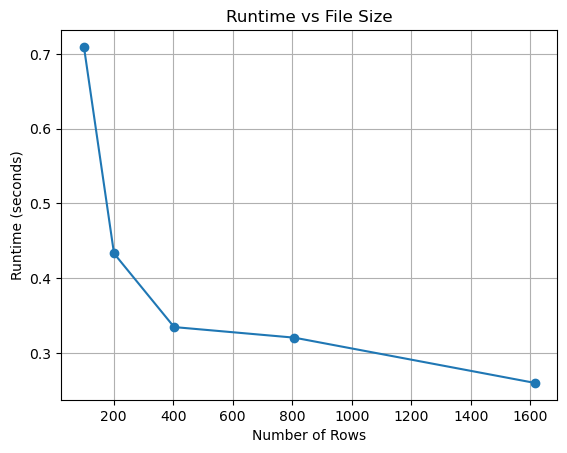

In [8]:
plt.plot(sizes, runtimes, marker='o')
plt.title("Runtime vs File Size")
plt.xlabel("Number of Rows")
plt.ylabel("Runtime (seconds)")
plt.grid(True)
plt.savefig("runtime_plot.png")
plt.show()

In [9]:
spark.stop()